In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_df = pd.read_csv("covid_19_india.csv")

In [3]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [5]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [6]:
covid_df.shape

(9291, 9)

In [7]:
covid_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
covid_df.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.432994,0.290920,0.425833
Cured,0.432994,1.000000,0.893227,0.995012
Deaths,0.290920,0.893227,1.000000,0.913777
Confirmed,0.425833,0.995012,0.913777,1.000000


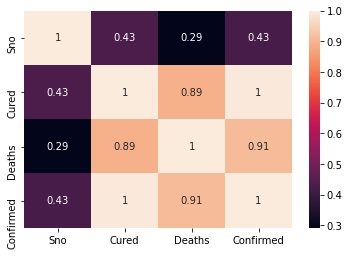

In [9]:
plt.figure()
sns.heatmap(covid_df.corr(),annot=True)
plt.show()

In [10]:
# we can drop the coloums which are not needed
covid_df = covid_df.drop(["Sno","ConfirmedIndianNational","ConfirmedForeignNational"],axis=1)
print(covid_df)
covid_df.shape

          Date     Time State/UnionTerritory   Cured  Deaths  Confirmed
0     30/01/20  6:00 PM               Kerala       0       0          1
1     31/01/20  6:00 PM               Kerala       0       0          1
2     01/02/20  6:00 PM               Kerala       0       0          2
3     02/02/20  6:00 PM               Kerala       0       0          3
4     03/02/20  6:00 PM               Kerala       0       0          3
...        ...      ...                  ...     ...     ...        ...
9286  09/12/20  8:00 AM            Telengana  266120    1480     275261
9287  09/12/20  8:00 AM              Tripura   32169     373      32945
9288  09/12/20  8:00 AM          Uttarakhand   72435    1307      79141
9289  09/12/20  8:00 AM        Uttar Pradesh  528832    7967     558173
9290  09/12/20  8:00 AM          West Bengal  475425    8820     507995

[9291 rows x 6 columns]


(9291, 6)

In [11]:
# the columns which we want to work
covid_df = covid_df[["Date","Time","State/UnionTerritory","Cured","Deaths","Confirmed"]]

In [12]:
covid_df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
9286,09/12/20,8:00 AM,Telengana,266120,1480,275261
9287,09/12/20,8:00 AM,Tripura,32169,373,32945
9288,09/12/20,8:00 AM,Uttarakhand,72435,1307,79141
9289,09/12/20,8:00 AM,Uttar Pradesh,528832,7967,558173


In [13]:
# Rename column name
covid_df = covid_df.rename(columns={"State/UnionTerritory":"States"})

In [14]:
covid_df.head()

,Date,Time,States,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3


## Check unique state/UT names, fix state names appearing twice or more due to spelling mistakes.

In [15]:
covid_df["States"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [16]:
covid_df["States"].nunique()

45

In [17]:
covid_df = covid_df.replace("Telengana","Telangana")
covid_df = covid_df.replace("Telengana***","Telangana")
covid_df = covid_df.replace("Telengana***","Telangana")
covid_df = covid_df.replace("Telangana***","Telangana")
covid_df = covid_df.replace("Maharashtra***","Maharashtra")
covid_df = covid_df.replace("Chandigarh***","Chandigarh")
covid_df = covid_df.replace("Punjab***","Punjab")

In [18]:
covid_df["States"].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [19]:
covid_df["States"].nunique()

39

## <b>Data count per states</b>

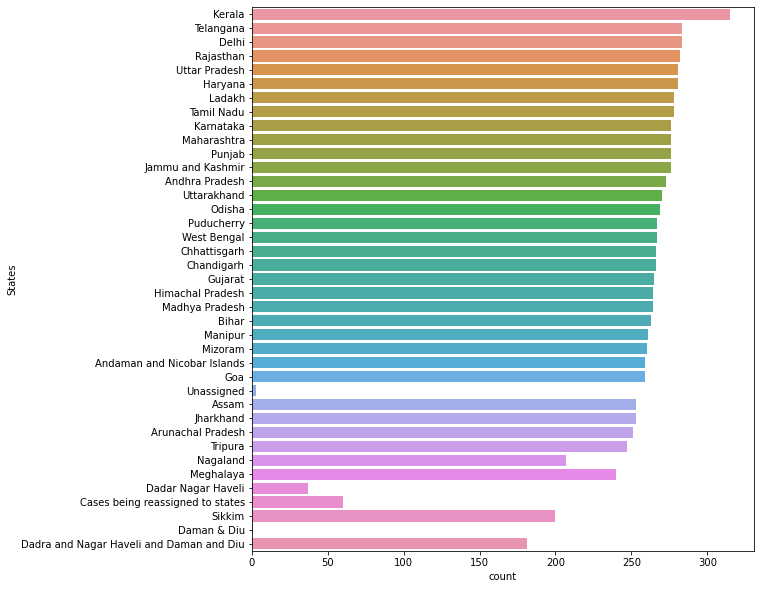

In [20]:
plt.figure(figsize=(9,10))
sns.countplot(data=covid_df,y="States")
plt.show()

## Calculate per day average confirmed cases for all states/UT.

In [21]:
avg_cases = covid_df.groupby(["Date","States"])["Confirmed"].mean()

In [22]:
avg_cases

Date      States                     
01/02/20  Kerala                              2
01/03/20  Kerala                              3
01/04/20  Andaman and Nicobar Islands        10
          Andhra Pradesh                     83
          Assam                               1
                                          ...  
31/10/20  Telangana                      238632
          Tripura                         30717
          Uttar Pradesh                  480082
          Uttarakhand                     61915
          West Bengal                    369671
Name: Confirmed, Length: 9291, dtype: int64

## Linegraph that shows distribution of per day confirmed cases in Maharashtra in 2020.

<b> method 1</b>

In [23]:
maharashtra_cases = covid_df[covid_df["States"] == "Maharashtra"]

In [24]:
maharashtra_cases

,Date,Time,States,Cured,Deaths,Confirmed
76,09/03/20,6:00 PM,Maharashtra,0,0,2
91,10/03/20,6:00 PM,Maharashtra,0,0,5
97,11/03/20,6:00 PM,Maharashtra,0,0,2
120,12/03/20,6:00 PM,Maharashtra,0,0,11
133,13/03/20,6:00 PM,Maharashtra,0,0,14
...,...,...,...,...,...,...
9135,05/12/20,8:00 AM,Maharashtra,1710050,47599,1842587
9170,06/12/20,8:00 AM,Maharashtra,1715884,47694,1847509
9205,07/12/20,8:00 AM,Maharashtra,1723370,47734,1852266
9240,08/12/20,8:00 AM,Maharashtra,1730715,47774,1855341


In [25]:
date = maharashtra_cases[maharashtra_cases["Date"].isin(["09/03/20","09/04/20","09/05/20","09/06/20","09/07/20","09/08/20","09/09/20","09/10/20","09/11/20","09/12/20"])]

In [26]:
date

,Date,Time,States,Cured,Deaths,Confirmed
76,09/03/20,6:00 PM,Maharashtra,0,0,2
788,09/04/20,5:00 PM,Maharashtra,117,72,1135
1756,09/05/20,8:00 AM,Maharashtra,3470,731,19063
2829,09/06/20,8:00 AM,Maharashtra,40975,3169,88528
3910,09/07/20,8:00 AM,Maharashtra,123192,9448,223724
5005,09/08/20,8:00 AM,Maharashtra,338362,17367,503084
6090,09/09/20,8:00 AM,Maharashtra,672556,27407,943772
7140,09/10/20,8:00 AM,Maharashtra,1212016,39430,1493884
8225,09/11/20,8:00 AM,Maharashtra,1577322,45240,1719858
9275,09/12/20,8:00 AM,Maharashtra,1737080,47827,1859367


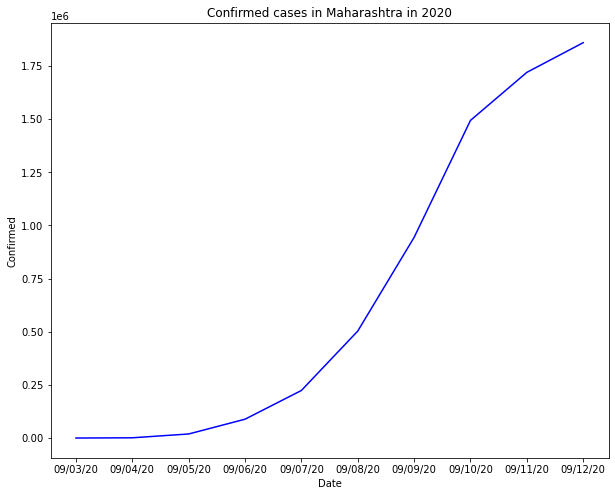

In [27]:
plt.figure(figsize=(10,8))

plt.title("Confirmed cases in Maharashtra in 2020")
sns.lineplot(data=date,x='Date',y='Confirmed',color="blue")

plt.show()

## Visualizing death cases in maharashtra

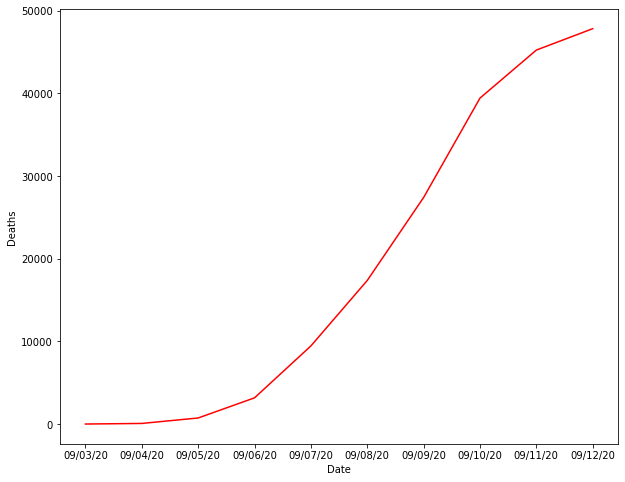

In [28]:
plt.figure(figsize = (10,8))
sns.lineplot(x="Date",y="Deaths",data=date,color="r")
plt.show()

<b>Method 2</b>

In [29]:
mah_cases = covid_df[covid_df["States"]=="Maharashtra"]

In [30]:
dates=mah_cases["Date"]
confirmed=mah_cases["Confirmed"]

<AxesSubplot:xlabel='Date'>

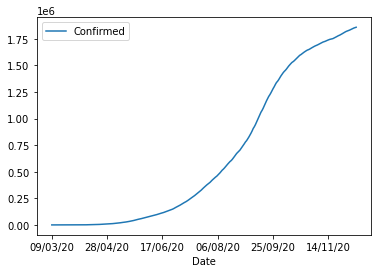

In [31]:
mah_cases.plot(x="Date",y="Confirmed")

## Plot a pie-chart displaying percentage of total cured and total death cases in Maharashtra.

In [32]:
maharashtra_cases = covid_df[covid_df["States"] == "Maharashtra"]

In [33]:
maharashtra_cases

,Date,Time,States,Cured,Deaths,Confirmed
76,09/03/20,6:00 PM,Maharashtra,0,0,2
91,10/03/20,6:00 PM,Maharashtra,0,0,5
97,11/03/20,6:00 PM,Maharashtra,0,0,2
120,12/03/20,6:00 PM,Maharashtra,0,0,11
133,13/03/20,6:00 PM,Maharashtra,0,0,14
...,...,...,...,...,...,...
9135,05/12/20,8:00 AM,Maharashtra,1710050,47599,1842587
9170,06/12/20,8:00 AM,Maharashtra,1715884,47694,1847509
9205,07/12/20,8:00 AM,Maharashtra,1723370,47734,1852266
9240,08/12/20,8:00 AM,Maharashtra,1730715,47774,1855341


In [34]:
total_cured_mah = maharashtra_cases["Cured"].sum()
total_death_mah = maharashtra_cases["Deaths"].sum()

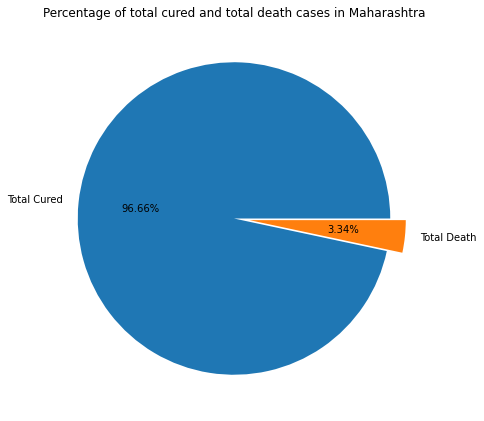

In [35]:
plt.figure(figsize=(7,8)) 
plt.title("Percentage of total cured and total death cases in Maharashtra")
labels = "Total Cured","Total Death"
sizes = [total_cured_mah,total_death_mah]
plt.pie(sizes,labels=labels,autopct="%1.2f%%",explode=(0,0.1))

plt.show()

## Plot a barplot showing top-5 states with maximum number of total confirmed cases.

In [36]:
total_states = covid_df.groupby(["States"])["Confirmed"].sum()

In [37]:
state_list = total_states.sort_values(ascending=False).head()

In [38]:
state_list

States
Maharashtra       181173762
Andhra Pradesh     84815303
Tamil Nadu         82789540
Karnataka          79354749
Uttar Pradesh      50283822
Name: Confirmed, dtype: int64

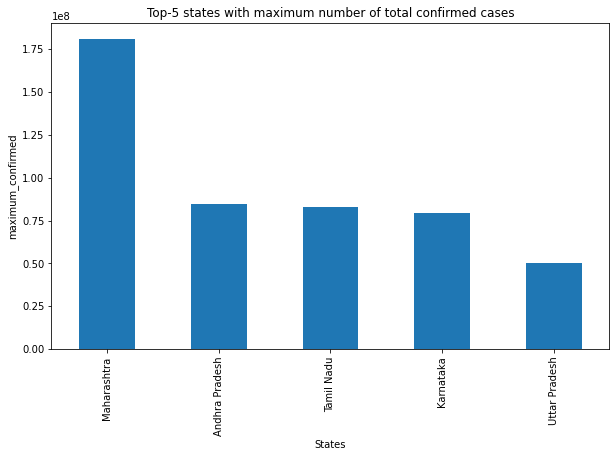

In [39]:
plt.figure(figsize=(10,6))
state_list.plot(kind="bar")
plt.title("Top-5 states with maximum number of total confirmed cases")
plt.xlabel("States")
plt.ylabel("maximum_confirmed")
plt.show()

## Which 3 states have lowest total death cases.

In [40]:
states = covid_df.groupby("States")["Deaths"].sum()

In [41]:
states.sort_values().head(3)

States
Unassigned                          0
Cases being reassigned to states    0
Daman & Diu                         0
Name: Deaths, dtype: int64

In [42]:
states.sort_values().head(4)

States
Unassigned                          0
Cases being reassigned to states    0
Daman & Diu                         0
Dadar Nagar Haveli                  0
Name: Deaths, dtype: int64

## 7. Plot multi linegraph that shows distribution of per day confirmed cases,death cases and cured cases in India in 2020.

In [43]:
all_dates = covid_df["Date"].unique()

In [44]:
all_dates

array(['30/01/20', '31/01/20', '01/02/20', '02/02/20', '03/02/20',
       '04/02/20', '05/02/20', '06/02/20', '07/02/20', '08/02/20',
       '09/02/20', '10/02/20', '11/02/20', '12/02/20', '13/02/20',
       '14/02/20', '15/02/20', '16/02/20', '17/02/20', '18/02/20',
       '19/02/20', '20/02/20', '21/02/20', '22/02/20', '23/02/20',
       '24/02/20', '25/02/20', '26/02/20', '27/02/20', '28/02/20',
       '29/02/20', '01/03/20', '02/03/20', '03/03/20', '04/03/20',
       '05/03/20', '06/03/20', '07/03/20', '08/03/20', '09/03/20',
       '10/03/20', '11/03/20', '12/03/20', '13/03/20', '14/03/20',
       '15/03/20', '16/03/20', '17/03/20', '18/03/20', '19/03/20',
       '20/03/20', '21/03/20', '22/03/20', '23/03/20', '24/03/20',
       '25/03/20', '26/03/20', '27/03/20', '28/03/20', '29/03/20',
       '30/03/20', '31/03/20', '01/04/20', '02/04/20', '03/04/20',
       '04/04/20', '05/04/20', '06/04/20', '07/04/20', '08/04/20',
       '09/04/20', '10/04/20', '11/04/20', '12/04/20', '13/04/

In [45]:
Year_date = covid_df[covid_df["Date"].isin(["31/01/20","01/02/20","01/03/20","01/04/20","01/05/20","01/06/20","01/07/20","01/08/20","01/09/20","01/10/20","01/11/20","09/12/20"])]

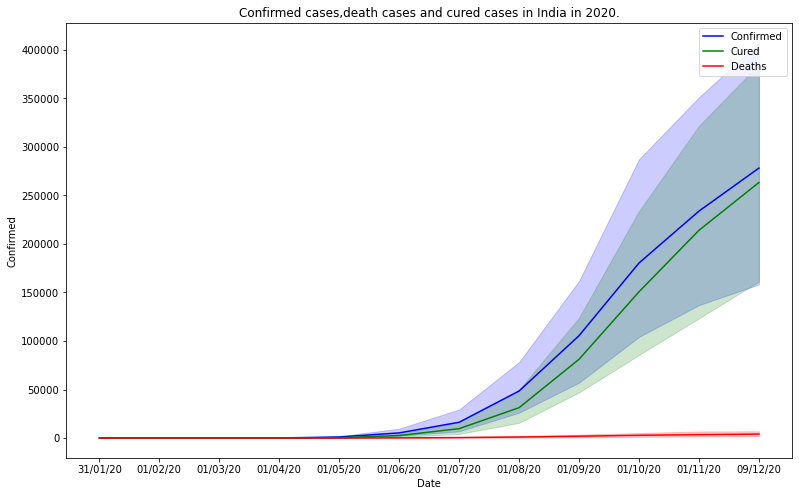

In [46]:
plt.figure(figsize=(13,8))
sns.lineplot(data=Year_date,x="Date",y="Confirmed",color="Blue")
sns.lineplot(data=Year_date,x="Date",y="Cured",color="Green")
sns.lineplot(data=Year_date,x="Date",y="Deaths",color="Red")
plt.legend(labels=["Confirmed","Cured","Deaths"])
plt.title("Confirmed cases,death cases and cured cases in India in 2020.")
plt.show()

## confirmed cases,death cases and cured cases in Maharashtra in 2020.

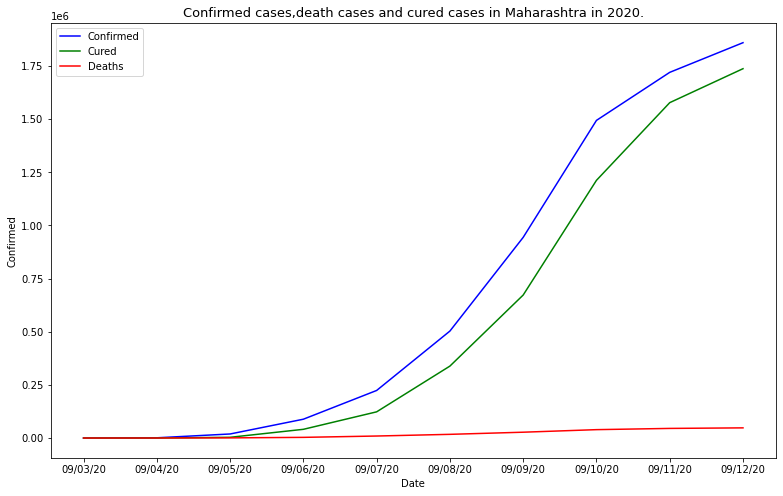

In [47]:
plt.figure(figsize=(13,8))
pp = sns.lineplot(data=date,x="Date",y="Confirmed",color="Blue")
pp = sns.lineplot(data=date,x="Date",y="Cured",color="Green")
pp = sns.lineplot(data=date,x="Date",y="Deaths",color="Red")
plt.legend(labels=["Confirmed","Cured","Deaths"])
plt.title("Confirmed cases,death cases and cured cases in Maharashtra in 2020.",size=13)
plt.show()